In [0]:
pip install openpyxl

Python interpreter will be restarted.
Collecting openpyxl
 Using cached openpyxl-3.0.7-py2.py3-none-any.whl (243 kB)
Processing /home/root/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31/et_xmlfile-1.0.1-py3-none-any.whl
Installing collected packages: et-xmlfile, openpyxl
Successfully installed et-xmlfile-1.0.1 openpyxl-3.0.7
Python interpreter will be restarted.

In [0]:
import pandas as pd
import numpy as np
# identify name of xlsx file (which can change when uploaded)
xlsx_filename = "http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"

# schema of the excel spreadsheet data range
orders_schema = {
  'InvoiceNo':np.str,
  'StockCode':np.str,
  'Description':np.str,
  'Quantity':np.int64,
  'InvoiceDate':np.datetime64,
  'UnitPrice':np.float64,
  'CustomerID':np.str,
  'Country':np.str  
  }

# read spreadsheet to pandas dataframe
# the xlrd library (loaded at the top of this notebook) is required for this step to work 
orders_pd = pd.read_excel(
  xlsx_filename, 
  sheet_name='Online Retail',
  header=0, # first row is header
  dtype=orders_schema
  )

# calculate sales amount as quantity * unit price
orders_pd['SalesAmount'] = orders_pd['Quantity'] * orders_pd['UnitPrice']

In [0]:
# convert pandas DF to Spark DF
orders = spark.createDataFrame(orders_pd)

# present Spark DF as queriable view
orders.createOrReplaceTempView('orders')

In [0]:
%sql

SELECT
  a.CustomerID,
  MIN(
    DATEDIFF(
      b.current_date,
      a.InvoiceDate
      )
    ) as recency,
  COUNT(DISTINCT TO_DATE(a.InvoiceDate)) as frequency,
  SUM(a.SalesAmount) as monetary_value
FROM orders a
CROSS JOIN (SELECT MAX(TO_DATE(InvoiceDate)) as current_date FROM orders) b
WHERE a.CustomerID IS NOT NULL
GROUP BY a.CustomerID
ORDER BY a.CustomerID;

CustomerID,recency,frequency,monetary_value
12346,325,1,0.0
12347,2,7,4310.0
12348,75,4,1797.24
12349,18,1,1757.55
12350,310,1,334.40000000000003
12352,36,7,1545.4099999999999
12353,204,1,89.0
12354,232,1,1079.4
12355,214,1,459.4
12356,22,3,2811.4300000000003


In [0]:
from pyspark.sql.functions import to_date, datediff, min, max, sum, countDistinct, expr

a = orders

b = (
  orders
    .groupBy()
      .agg(
        max(to_date(orders.InvoiceDate)).alias('current_date')
        )
  )

rfm = (
  a
    .filter(a.CustomerID.isNotNull())
    .crossJoin(b)
    .groupBy(a.CustomerID)
      .agg(
        min(datediff(b.current_date, a.InvoiceDate)).alias('recency'),
        countDistinct(to_date(a.InvoiceDate)).alias('frequency'),
        sum(a.SalesAmount).alias('monetary_total')
        )
     .withColumn('monetary_value', expr('monetary_total/ frequency'))
  ).orderBy(a.CustomerID)

rfm.createOrReplaceTempView('rfm')
display(rfm)

CustomerID,recency,frequency,monetary_total,monetary_value
12346,325,1,0.0,0.0
12347,2,7,4310.0,615.7142857142857
12348,75,4,1797.24,449.31
12349,18,1,1757.55,1757.55
12350,310,1,334.40000000000003,334.40000000000003
12352,36,7,1545.4099999999999,220.77285714285713
12353,204,1,89.0,89.0
12354,232,1,1079.4,1079.4
12355,214,1,459.4,459.4
12356,22,3,2811.4300000000003,937.1433333333334


In [0]:
%sql

SELECT
  x.CustomerID,
  x.recency,
  CASE -- the higher the recency, the lower the score
    WHEN x.recency > recency_90 THEN 1
    WHEN x.recency > recency_80 THEN 2
    WHEN x.recency > recency_70 THEN 3
    WHEN x.recency > recency_60 THEN 4
    WHEN x.recency > recency_50 THEN 5
    WHEN x.recency > recency_40 THEN 6
    WHEN x.recency > recency_30 THEN 7
    WHEN x.recency > recency_20 THEN 8
    WHEN x.recency > recency_10 THEN 9
    ELSE 10
    END as recency_score,
  x.frequency,
  CASE -- the higher the frequency, the higher the score
    WHEN x.frequency > frequency_90 THEN 10
    WHEN x.frequency > frequency_80 THEN 9
    WHEN x.frequency > frequency_70 THEN 8
    WHEN x.frequency > frequency_60 THEN 7
    WHEN x.frequency > frequency_50 THEN 6
    WHEN x.frequency > frequency_40 THEN 5
    WHEN x.frequency > frequency_30 THEN 4
    WHEN x.frequency > frequency_20 THEN 3
    WHEN x.frequency > frequency_10 THEN 2
    ELSE 1
    END as frequency_score,
  x.monetary_value,
  CASE -- the higher the monetary_value, the higher the score
    WHEN x.monetary_value > monetary_value_90 THEN 10
    WHEN x.monetary_value > monetary_value_80 THEN 9
    WHEN x.monetary_value > monetary_value_70 THEN 8
    WHEN x.monetary_value > monetary_value_60 THEN 7
    WHEN x.monetary_value > monetary_value_50 THEN 6
    WHEN x.monetary_value > monetary_value_40 THEN 5
    WHEN x.monetary_value > monetary_value_30 THEN 4
    WHEN x.monetary_value > monetary_value_20 THEN 3
    WHEN x.monetary_value > monetary_value_10 THEN 2
    ELSE 1
    END as monetary_score        
FROM rfm x
CROSS JOIN (
  SELECT  -- calculate the quantile cutoff values for each metric
   percentile_approx( a.recency, 0.1, 1000000) as recency_10,
   percentile_approx( a.recency, 0.2, 1000000) as recency_20,
   percentile_approx( a.recency, 0.3, 1000000) as recency_30,
   percentile_approx( a.recency, 0.4, 1000000) as recency_40,
   percentile_approx( a.recency, 0.5, 1000000) as recency_50,
   percentile_approx( a.recency, 0.6, 1000000) as recency_60,
   percentile_approx( a.recency, 0.7, 1000000) as recency_70,
   percentile_approx( a.recency, 0.8, 1000000) as recency_80,
   percentile_approx( a.recency, 0.9, 1000000) as recency_90,
   percentile_approx( a.frequency, 0.1, 1000000) as frequency_10,
   percentile_approx( a.frequency, 0.2, 1000000) as frequency_20,
   percentile_approx( a.frequency, 0.3, 1000000) as frequency_30,
   percentile_approx( a.frequency, 0.4, 1000000) as frequency_40,
   percentile_approx( a.frequency, 0.5, 1000000) as frequency_50,
   percentile_approx( a.frequency, 0.6, 1000000) as frequency_60,
   percentile_approx( a.frequency, 0.7, 1000000) as frequency_70,
   percentile_approx( a.frequency, 0.8, 1000000) as frequency_80,
   percentile_approx( a.frequency, 0.9, 1000000) as frequency_90,
   percentile_approx( a.monetary_value, 0.1, 1000000) as monetary_value_10,
   percentile_approx( a.monetary_value, 0.2, 1000000) as monetary_value_20,
   percentile_approx( a.monetary_value, 0.3, 1000000) as monetary_value_30,
   percentile_approx( a.monetary_value, 0.4, 1000000) as monetary_value_40,
   percentile_approx( a.monetary_value, 0.5, 1000000) as monetary_value_50,
   percentile_approx( a.monetary_value, 0.6, 1000000) as monetary_value_60,
   percentile_approx( a.monetary_value, 0.7, 1000000) as monetary_value_70,
   percentile_approx( a.monetary_value, 0.8, 1000000) as monetary_value_80,
   percentile_approx( a.monetary_value, 0.9, 1000000) as monetary_value_90 
  FROM rfm a
  ) y
ORDER BY x.CustomerID

CustomerID,recency,recency_score,frequency,frequency_score,monetary_value,monetary_score
12346,325,1,1,1,0.0,1
12347,2,10,7,9,615.7142857142857,9
12348,75,4,4,7,449.31,9
12349,18,8,1,1,1757.55,10
12350,310,1,1,1,334.40000000000003,7
12352,36,6,7,9,220.77285714285713,5
12353,204,2,1,1,89.0,1
12354,232,2,1,1,1079.4,10
12355,214,2,1,1,459.4,9
12356,22,7,3,6,937.1433333333334,10


In [0]:
from pyspark.sql.functions import when

# extract the quantile cutoffs for each metric
r_quantile = rfm.approxQuantile('recency', np.linspace(0.1, 0.9, num=9).tolist(), 0)
f_quantile = rfm.approxQuantile('frequency',np.linspace(0.1, 0.9, num=9).tolist(), 0)
m_quantile = rfm.approxQuantile('monetary_value', np.linspace(0.1, 0.9, num=9).tolist(), 0)

scores = (
  rfm
    .withColumn('recency_score',
        when(rfm.recency >= r_quantile[8], 1).
        when(rfm.recency >= r_quantile[7] , 2).
        when(rfm.recency >= r_quantile[6] , 3).
        when(rfm.recency >= r_quantile[5] , 4).
        when(rfm.recency >= r_quantile[4] , 5).
        when(rfm.recency >= r_quantile[3] , 6).
        when(rfm.recency >= r_quantile[2] , 7).
        when(rfm.recency >= r_quantile[1] , 8).
        when(rfm.recency >= r_quantile[0] , 9).
        otherwise(10)
        )
    .withColumn('frequency_score', 
        when(rfm.frequency > f_quantile[8], 10).
        when(rfm.frequency > f_quantile[7] , 9).
        when(rfm.frequency > f_quantile[6] , 8).
        when(rfm.frequency > f_quantile[5] , 7).
        when(rfm.frequency > f_quantile[4] , 6).
        when(rfm.frequency > f_quantile[3] , 5).
        when(rfm.frequency > f_quantile[2] , 4).
        when(rfm.frequency > f_quantile[1] , 3).
        when(rfm.frequency > f_quantile[0] , 2).
        otherwise(1)
        )
    .withColumn('monetary_score', 
        when(rfm.monetary_value > m_quantile[8], 10).
        when(rfm.monetary_value > m_quantile[7] , 9).
        when(rfm.monetary_value > m_quantile[6] , 8).
        when(rfm.monetary_value > m_quantile[5] , 7).
        when(rfm.monetary_value > m_quantile[4] , 6).
        when(rfm.monetary_value > m_quantile[3] , 5).
        when(rfm.monetary_value > m_quantile[2] , 4).
        when(rfm.monetary_value > m_quantile[1] , 3).
        when(rfm.monetary_value > m_quantile[0] , 2).
        otherwise(1)
        )
    .select('CustomerID','recency','recency_score','frequency','frequency_score','monetary_value','monetary_score')
    .orderBy('CustomerID')
    )

display(scores)



CustomerID,recency,recency_score,frequency,frequency_score,monetary_value,monetary_score
12346,325,1,1,1,0.0,1
12347,2,10,7,9,615.7142857142857,9
12348,75,4,4,7,449.31,9
12349,18,8,1,1,1757.55,10
12350,310,1,1,1,334.40000000000003,7
12352,36,6,7,9,220.77285714285713,5
12353,204,2,1,1,89.0,1
12354,232,2,1,1,1079.4,10
12355,214,2,1,1,459.4,9
12356,22,7,3,6,937.1433333333334,10


In [0]:
%sql

 SELECT
   percentile_approx( a.frequency, 0.1, 1000000) as frequency_10,
   percentile_approx( a.frequency, 0.2, 1000000) as frequency_20,
   percentile_approx( a.frequency, 0.3, 1000000) as frequency_30,
   percentile_approx( a.frequency, 0.4, 1000000) as frequency_40,
   percentile_approx( a.frequency, 0.5, 1000000) as frequency_50,
   percentile_approx( a.frequency, 0.6, 1000000) as frequency_60,
   percentile_approx( a.frequency, 0.7, 1000000) as frequency_70,
   percentile_approx( a.frequency, 0.8, 1000000) as frequency_80,
   percentile_approx( a.frequency, 0.9, 1000000) as frequency_90
 FROM rfm a;

frequency_10,frequency_20,frequency_30,frequency_40,frequency_50,frequency_60,frequency_70,frequency_80,frequency_90
1,1,1,2,2,3,4,6,9


In [0]:
from sklearn.manifold import TSNE

# retrieve scores (move CustomerID to index to make later review easier)
scores_pd = scores.select('CustomerID', 'recency_score', 'frequency_score', 'monetary_score').toPandas()
scores_pd.set_index('CustomerID', drop=True, inplace=True)

# train the tsne model and compute x and y axes for our values 
tsne = TSNE(n_components=2, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(scores_pd)

# return the axes assignments to our metrics dataset
scores_pd['tsne_one'] = tsne_results[:,0]
scores_pd['tsne_two'] = tsne_results[:,1]

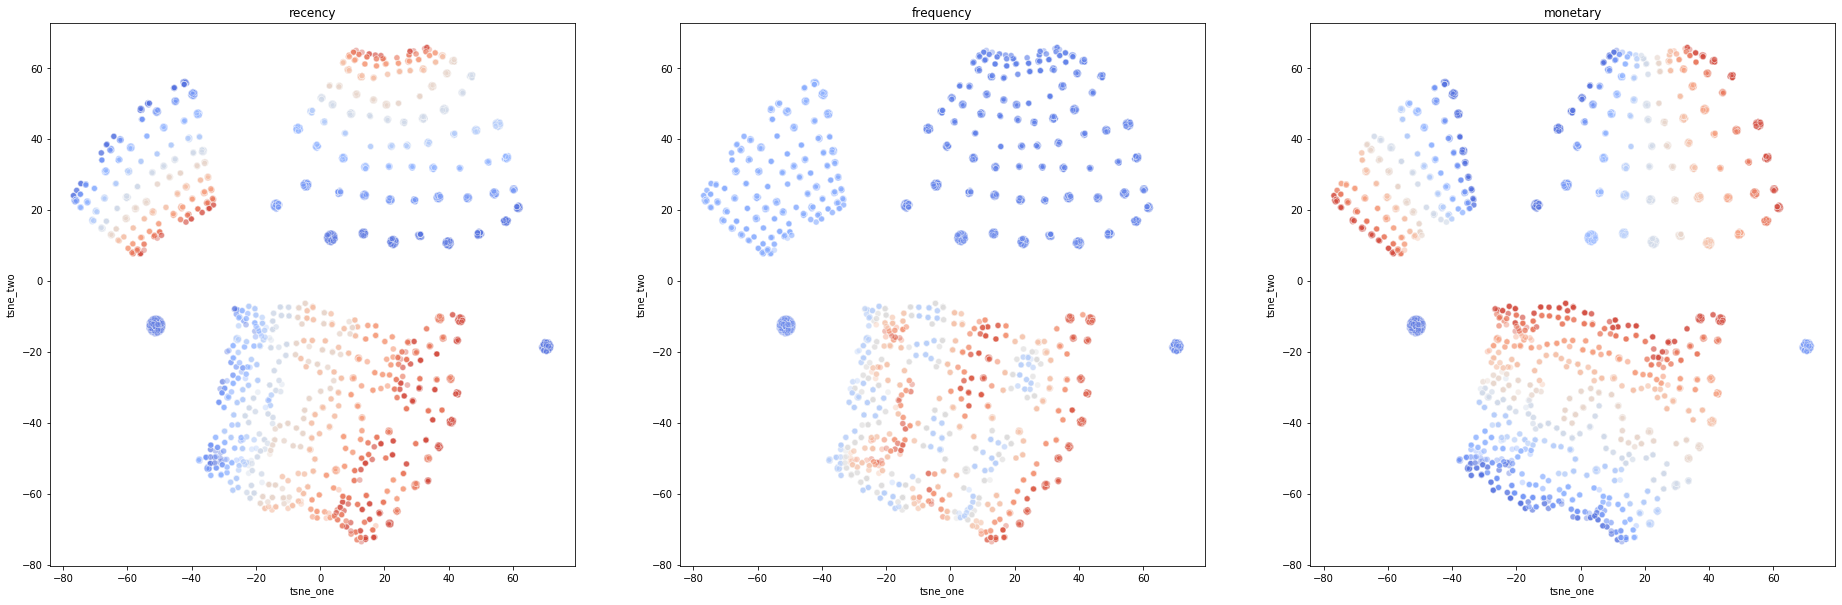

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# configure plot as three charts in a single row
f, axes = plt.subplots(nrows=1, ncols=3, squeeze=True, figsize=(32,10))

for i, metric in enumerate(['recency', 'frequency', 'monetary']):
  
  # unique values for this metric
  n = scores_pd[['{0}_score'.format(metric)]].nunique()[0]
  
  # use metric name as chart title
  axes[i].set_title(metric)
  
  # define chart
  sns.scatterplot(
    x='tsne_one',
    y='tsne_two',
    hue='{0}_score'.format(metric),
    palette=sns.color_palette('coolwarm', n),
    data=scores_pd,
    legend=False,
    alpha=0.4,
    ax = axes[i]
    )

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# function to train and score clusters based on k cluster count
def train_model( k ):
  km = KMeans(
    n_clusters=k, 
    init='random',
    n_init=1000
    )
  kmeans = km.fit_predict( inputs_broadcast.value )
  silhouette = silhouette_score( inputs_broadcast.value , kmeans)
  return (k, float(silhouette))

# assemble an rdd containing 5 instances of each k value from 2 to 20
rdd = (
  spark
    .range(2, 21, step=1, numPartitions=sc.defaultParallelism)
    .withColumnRenamed('id','k')
    .crossJoin( spark.range(0, 5) )
    .select('k')
    .rdd
    .map(lambda k: int(k[0]))
  )

# distribute the dataset on which we will perform our evaluation
inputs_pd = scores_pd[['recency_score', 'frequency_score', 'monetary_score']]
inputs_broadcast = sc.broadcast(inputs_pd)

# perform the training/evaluation work
results = rdd.map(train_model)

# release the distributed dataset
inputs_broadcast.unpersist()

# display the results of our analysis
display( spark.createDataFrame( results, schema=['clusters','silhouette']) )

clusters,silhouette
2,0.35673005929395385
2,0.35673005929395385
2,0.35673005929395385
2,0.35673005929395385
2,0.35673005929395385
3,0.3383781314271885
3,0.3383781314271885
3,0.3383781314271885
3,0.3383781314271885
3,0.3383781314271885


In [0]:
km = KMeans(
  n_clusters=8, 
  init='random',
  n_init=1000
  )
_ = km.fit( inputs_pd )

In [0]:
scores_pd['cluster'] = km.predict( inputs_pd )
scores_pd.head()

Out[10]:

,recency_score,frequency_score,monetary_score,tsne_one,tsne_two,cluster
CustomerID,,,,,,
12346,1,1,1,-50.488052,-11.288335,2
12347,10,9,9,36.308083,-20.558975,3
12348,4,7,9,-19.995647,-9.609043,6
12349,8,1,10,35.800926,64.298943,0
12350,1,1,7,39.432274,10.042526,7


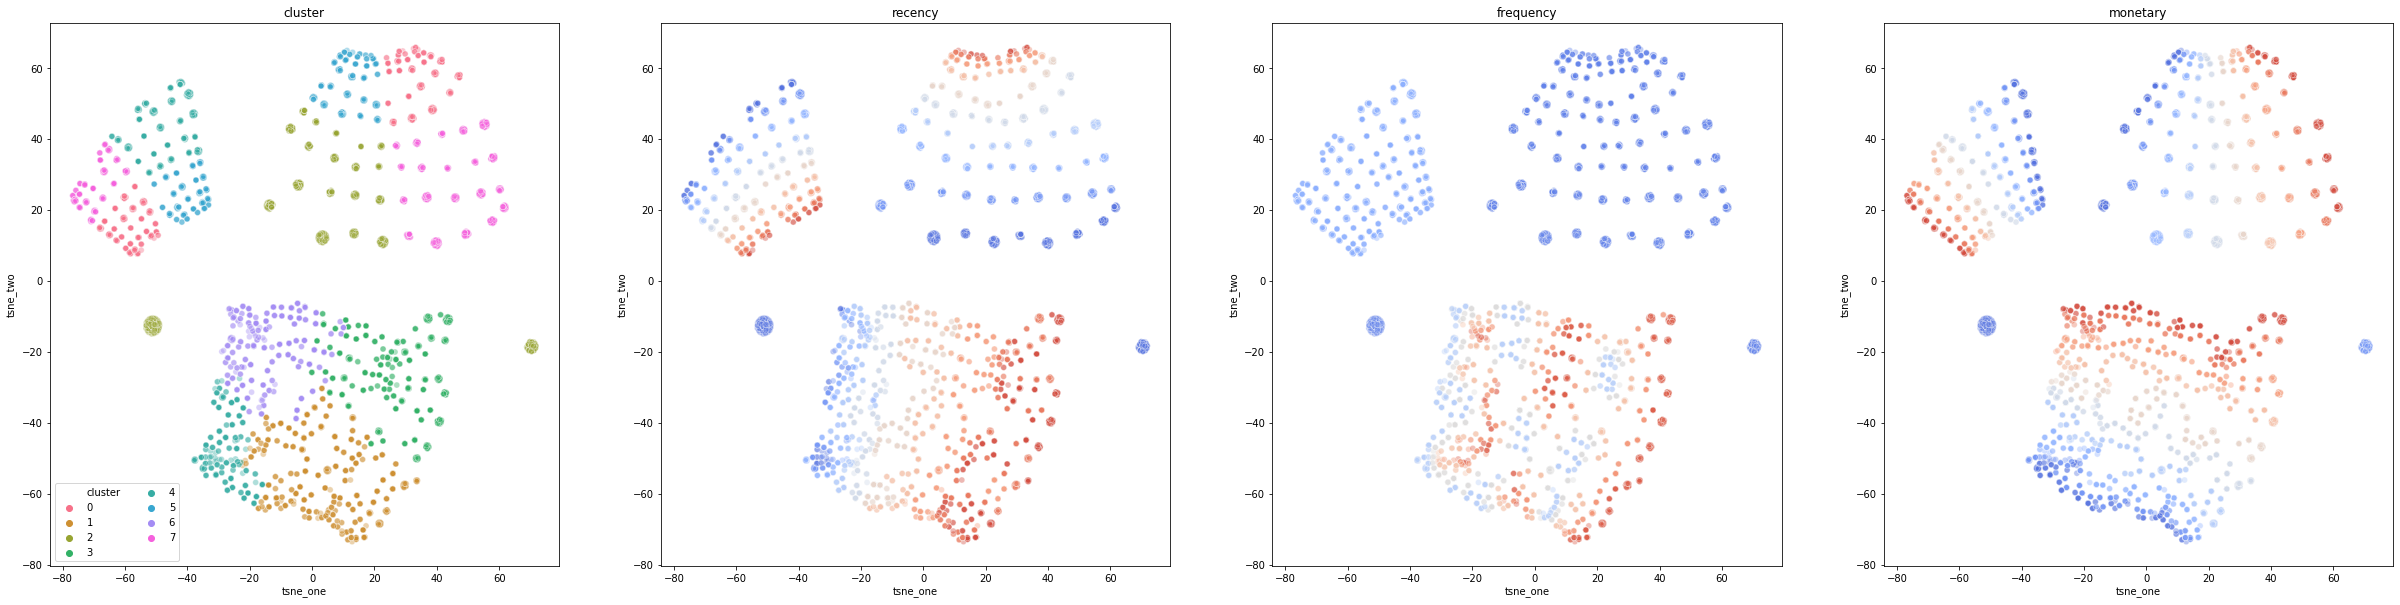

In [0]:
f, axes = plt.subplots(nrows=1, ncols=4, squeeze=True, figsize=(42, 10))

# chart the cluster assignments
axes[0].set_title('cluster')
sns.scatterplot(
  x='tsne_one',
  y='tsne_two',
  hue='cluster',
  palette=sns.color_palette('husl', scores_pd[['cluster']].nunique()[0]),
  data=scores_pd,
  legend='brief',
  alpha=0.4,
  ax = axes[0]
  )
axes[0].legend(loc='lower left', ncol=2, fancybox=True)

# chart the RFM scores
for i, metric in enumerate(['recency', 'frequency', 'monetary']):
  
  # unique values for this metric
  n = scores_pd[['{0}_score'.format(metric)]].nunique()[0]
  
  # use metric name as chart title
  axes[i+1].set_title(metric)
  
  # define chart
  sns.scatterplot(
    x='tsne_one',
    y='tsne_two',
    hue='{0}_score'.format(metric),
    palette=sns.color_palette('coolwarm', n),
    data=scores_pd,
    legend=False,
    alpha=0.4,
    ax = axes[i+1]
    )

In [0]:
# generate cluster numbers
clusters = map(lambda c: 'Cluster {}'.format(c), range(0, km.n_clusters))

# extract cluster centroids
metrics = {0:'R', 1:'F', 2:'M'}
centroids = map(lambda scores: ', '.join(['{}: {:.1f}'.format(metrics[i], s) for i,s in enumerate(scores)]) , km.cluster_centers_)

# combine cluster number with centroid info
list(zip(clusters, centroids))


Out[12]: [('Cluster 0', 'R: 6.6, F: 2.4, M: 8.0'),
 ('Cluster 1', 'R: 7.9, F: 8.1, M: 3.8'),
 ('Cluster 2', 'R: 2.0, F: 1.0, M: 2.7'),
 ('Cluster 3', 'R: 8.8, F: 8.8, M: 8.1'),
 ('Cluster 4', 'R: 3.2, F: 5.4, M: 2.7'),
 ('Cluster 5', 'R: 7.1, F: 2.3, M: 2.9'),
 ('Cluster 6', 'R: 4.8, F: 7.3, M: 8.0'),
 ('Cluster 7', 'R: 2.5, F: 1.9, M: 8.1')]